1. Instalación de Librerías Necesarias

In [1]:
# 1. Instalación de librerías necesarias
!pip install yfinance lightgbm scikit-learn xgboost matplotlib

2. Importar Librerías

In [9]:
# 2. Importar librerías
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

3. Descargar Datos (por ejemplo de Google (GOOGL))

In [10]:
# 3. Descargar datos de Google (GOOGL)
ticker = 'GOOGL'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Comprobar los datos descargados
print(f"Datos descargados para {ticker}:")
print(data.head())  # Muestra las primeras filas

[*********************100%***********************]  1 of 1 completed

Datos descargados para GOOGL:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  67.420502  68.433998  67.324501  68.433998  68.264961  27278000
2020-01-03  67.400002  68.687500  67.365997  68.075996  67.907852  23408000
2020-01-06  67.581497  69.916000  67.550003  69.890503  69.717865  46768000
2020-01-07  70.023003  70.175003  69.578003  69.755501  69.583206  34330000
2020-01-08  69.740997  70.592499  69.631500  70.251999  70.078476  35314000


4. Preprocesamiento de los Datos

In [11]:
# 4. Preprocesamiento de los datos
data['Date'] = data.index
data['Date'] = pd.to_datetime(data['Date']).map(pd.Timestamp.toordinal)
data['MA_5'] = data['Close'].rolling(window=5).mean()  # Media móvil de 5 días
data['MA_10'] = data['Close'].rolling(window=10).mean()  # Media móvil de 10 días
data['Volume'] = data['Volume']  # Volumen de operaciones

# Manejo de datos faltantes
data.dropna(inplace=True)

# Comprobar los datos preprocesados
print("Datos después del preprocesamiento:")
print(data.head())

Datos después del preprocesamiento:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2020-01-15  71.651001  72.039001  71.583000  71.959999  71.782257  21550000   
2020-01-16  72.272499  72.535004  72.000000  72.508003  72.328911  26080000   
2020-01-17  73.126999  74.027496  72.827499  73.975998  73.793274  52424000   
2020-01-21  73.949997  74.494003  73.510498  74.112503  73.929443  48930000   
2020-01-22  74.486504  75.028999  74.133003  74.193497  74.010239  28458000   

              Date       MA_5      MA_10  
Date                                      
2020-01-15  737439  71.585701  70.433650  
2020-01-16  737440  71.889401  70.841051  
2020-01-17  737441  72.395001  71.431051  
2020-01-21  737445  72.817201  71.853251  
2020-01-22  737446  73.350000  72.297050  


5. Dividir los Datos en Entrenamiento y Prueba

In [12]:
# 5. Dividir los datos en entrenamiento y prueba
X = data[['MA_5', 'MA_10', 'Volume']]  # Nuevas características
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Confirmar la división de los datos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 797
Tamaño del conjunto de prueba: 200


6. Función para Evaluar y Visualizar Modelos

In [13]:
# 6. Definir los modelos
models = {
    'Regresión Lineal': LinearRegression(),
    'K-Vecinos más Cercanos': KNeighborsRegressor(n_neighbors=5),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

7. Modelos a Evaluar

Regresión Lineal - RMSE: 2.30, MAE: 1.71, R²: 0.96


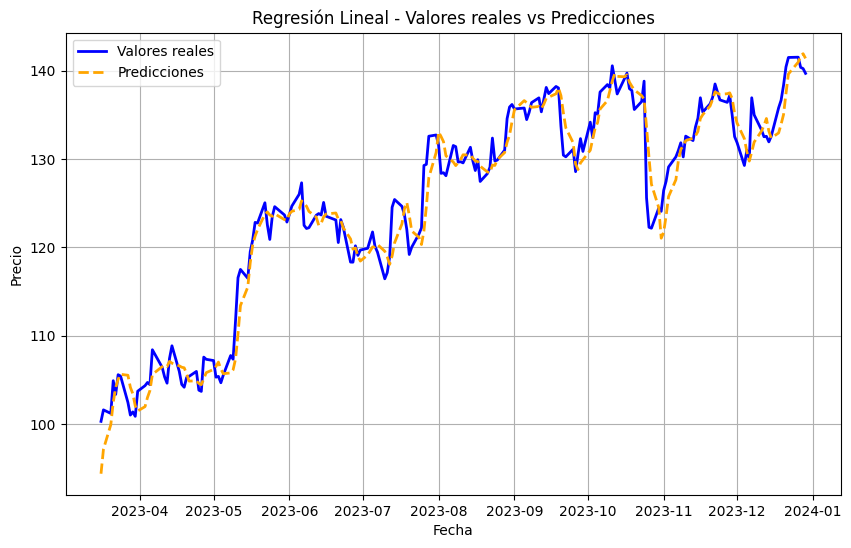

K-Vecinos más Cercanos - RMSE: 25.17, MAE: 21.49, R²: -3.78


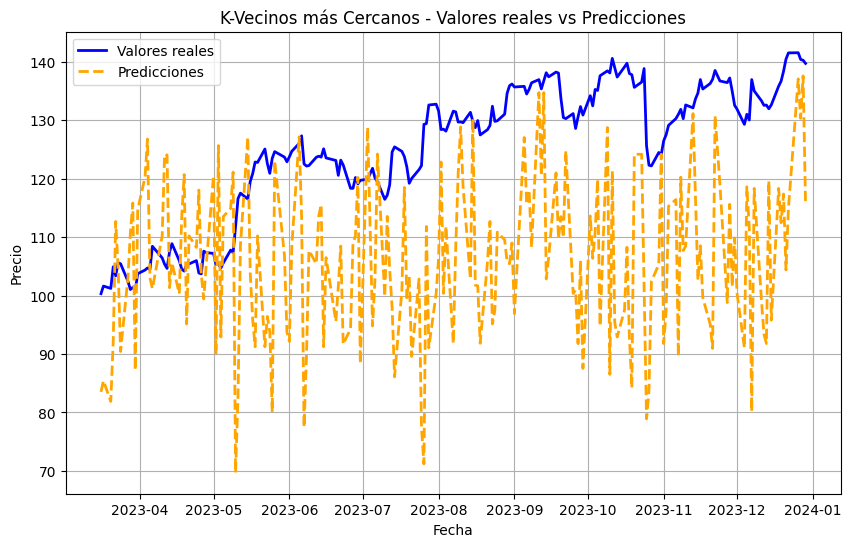

Árbol de Decisión - RMSE: 3.20, MAE: 2.36, R²: 0.92


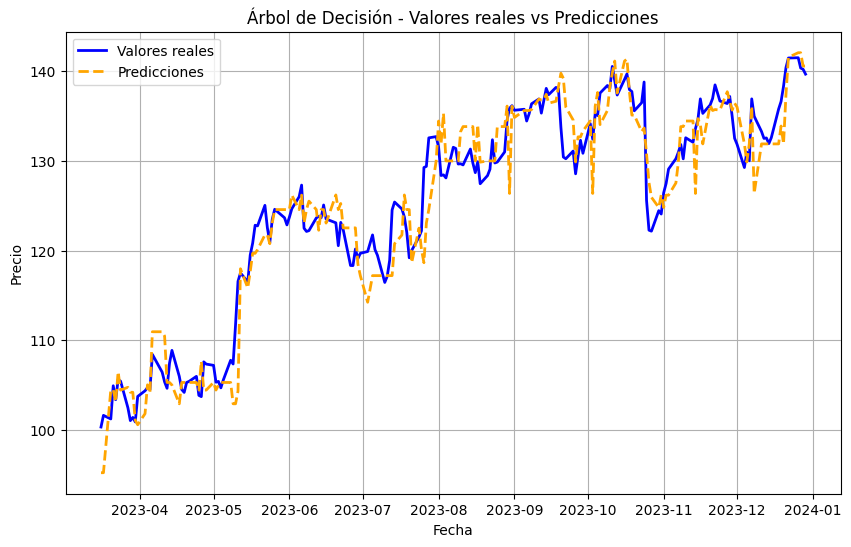

Random Forest - RMSE: 2.51, MAE: 1.91, R²: 0.95


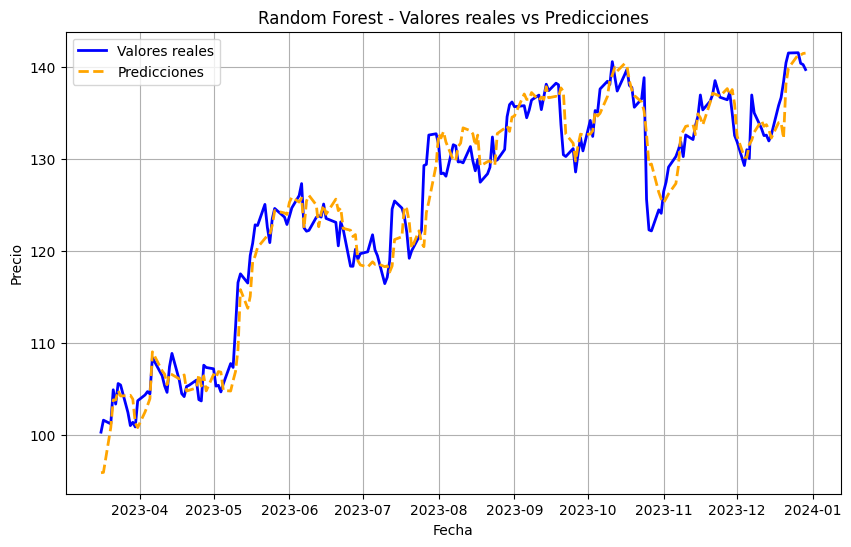

XGBoost - RMSE: 2.72, MAE: 2.00, R²: 0.94


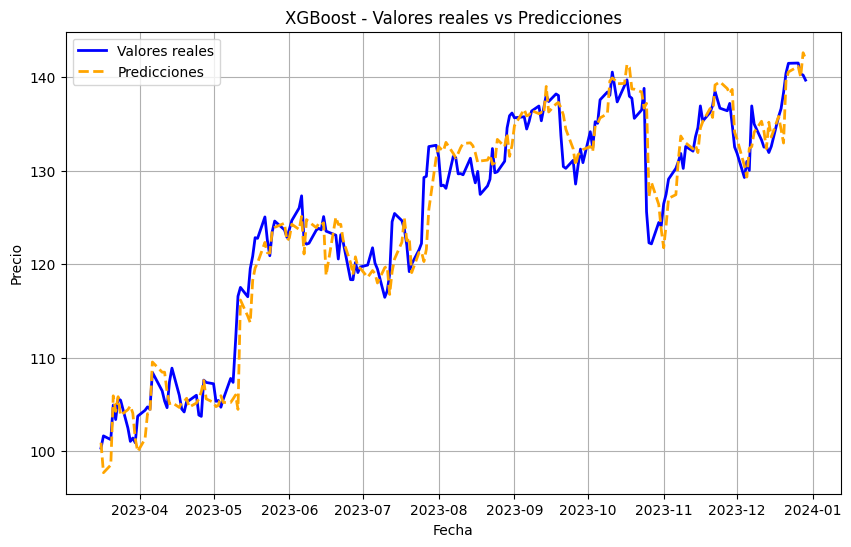

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 797, number of used features: 3
[LightGBM] [Info] Start training from score 104.018232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

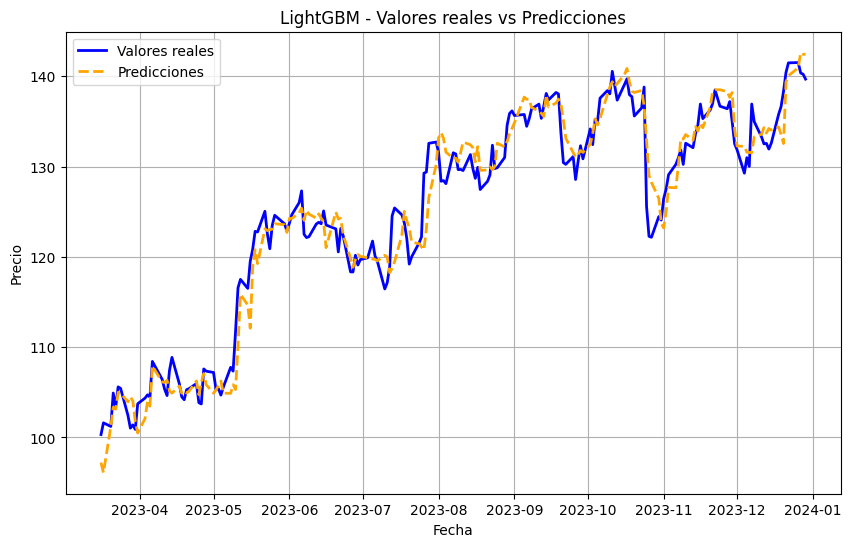

In [14]:
# 7. Entrenar y evaluar los modelos
def evaluate_and_plot(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}')
    
    # Asegurarse de que los índices estén alineados para la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Valores reales', color='blue', linewidth=2)
    plt.plot(y_test.index, y_pred, label='Predicciones', color='orange', linestyle='--', linewidth=2)
    plt.title(f'{model_name} - Valores reales vs Predicciones')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid()
    plt.show()
    
    return model

# Entrenar y evaluar los modelos
trained_models = {}
for name, model in models.items():
    trained_models[name] = evaluate_and_plot(model, X_train, y_train, X_test, y_test, name)

8. Función predicción a Futuro

In [15]:
def predict_future_corrected(model, historical_data, num_days=30):
    future_dates = []
    future_predictions = []
    last_data = historical_data.copy()  # Copia los datos históricos

    for i in range(num_days):
        # Incrementar la fecha
        next_date = last_data.index[-1] + pd.Timedelta(days=1)
        future_dates.append(next_date)
        
        # Seleccionar las últimas observaciones (sin incluir el precio actual)
        input_data = last_data[['MA_5', 'MA_10', 'Volume']].iloc[-1:]
        
        # Predecir el próximo valor (sin usar el precio actual)
        next_prediction = model.predict(input_data)[0]
        future_predictions.append(next_prediction)
        
        # Añadir la predicción para usarla en la próxima iteración
        new_row = {
            'Close': next_prediction,  # Aquí introducimos la predicción
            'Volume': last_data['Volume'].iloc[-1]  # Mantener el último volumen conocido
        }
        
        # Actualizar las medias móviles con la nueva predicción
        new_row['MA_5'] = last_data['Close'].rolling(window=5).mean().iloc[-1]  # Media móvil de 5 días
        new_row['MA_10'] = last_data['Close'].rolling(window=10).mean().iloc[-1]  # Media móvil de 10 días
        
        # Añadir la nueva fila a los datos históricos
        last_data = pd.concat([last_data, pd.DataFrame(new_row, index=[next_date])])

    return future_dates, future_predictions

9. Hacer Predicciones a Futuro con Todos los Modelos

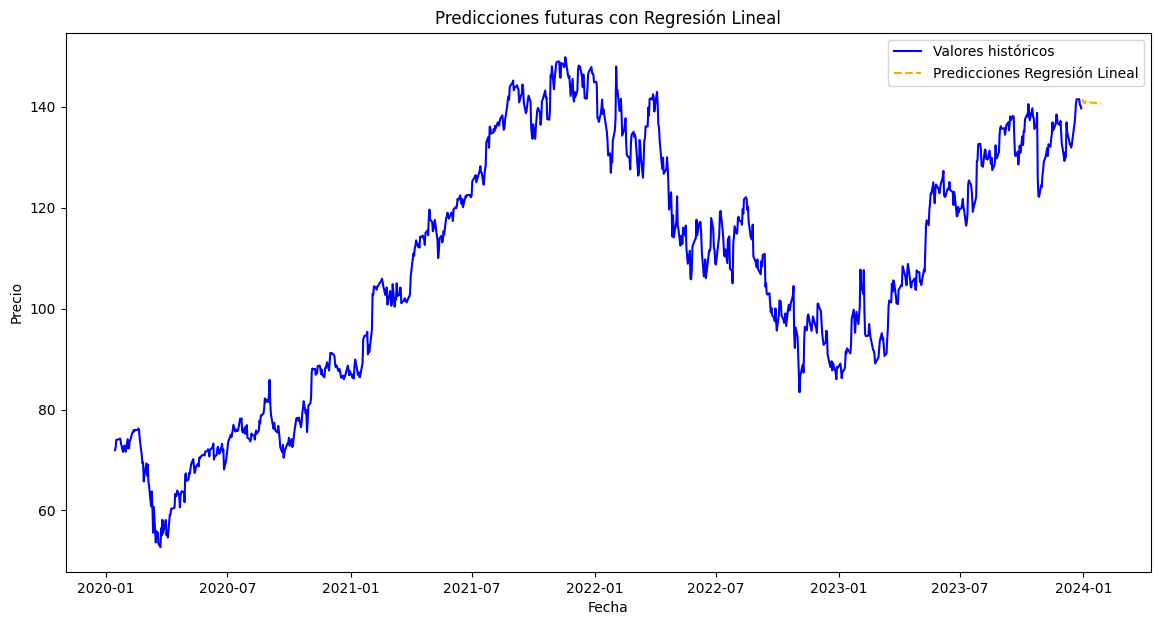

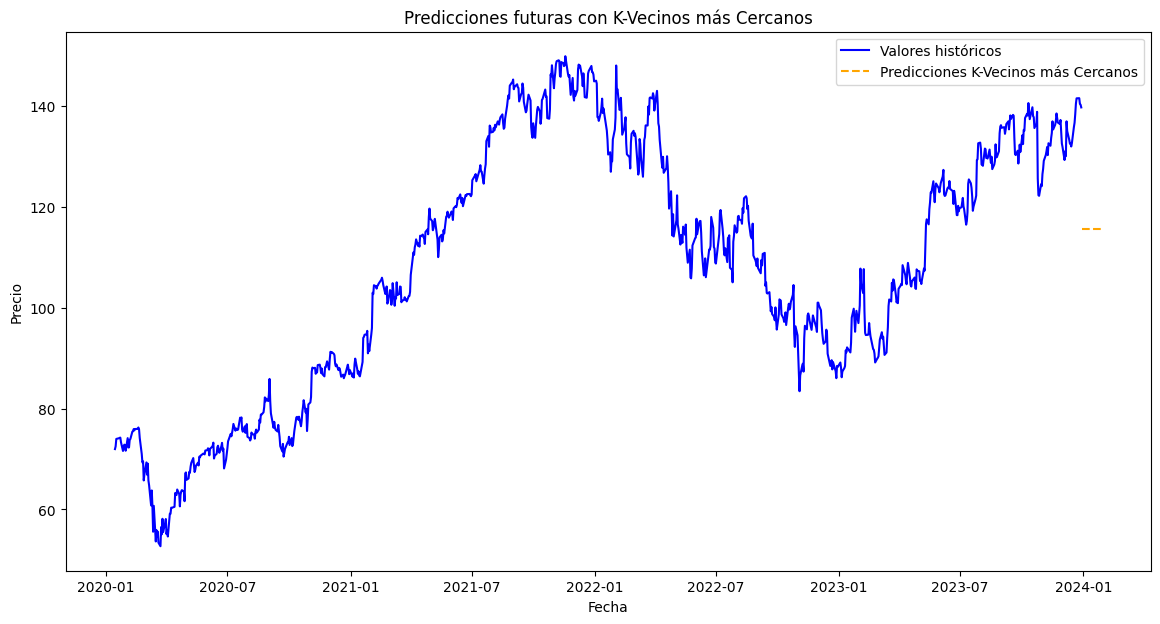

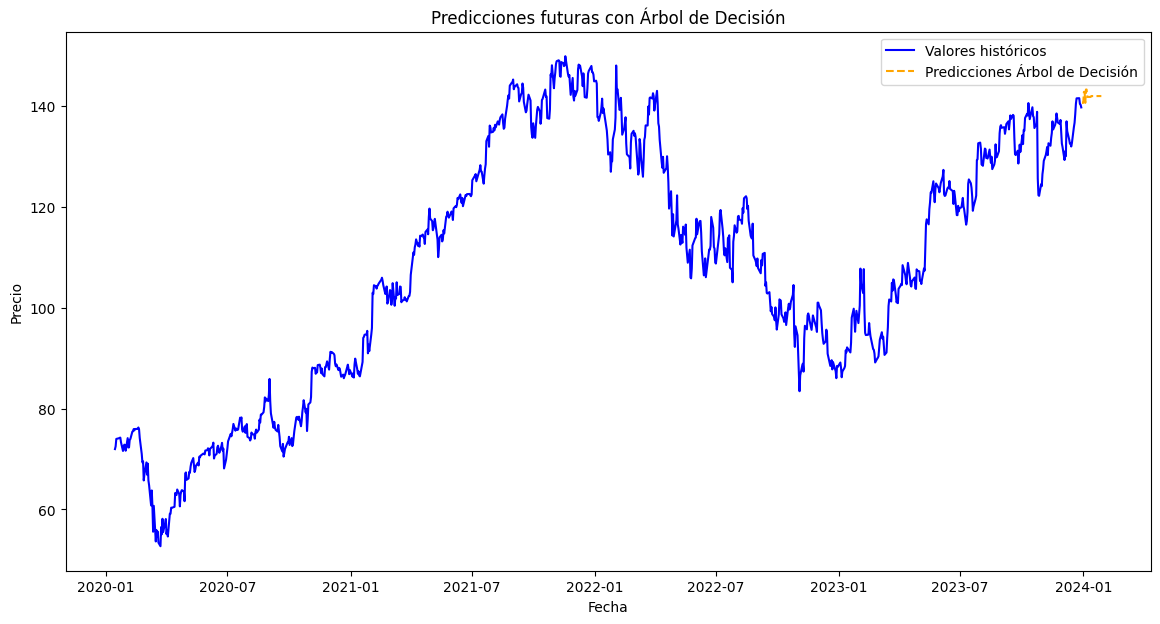

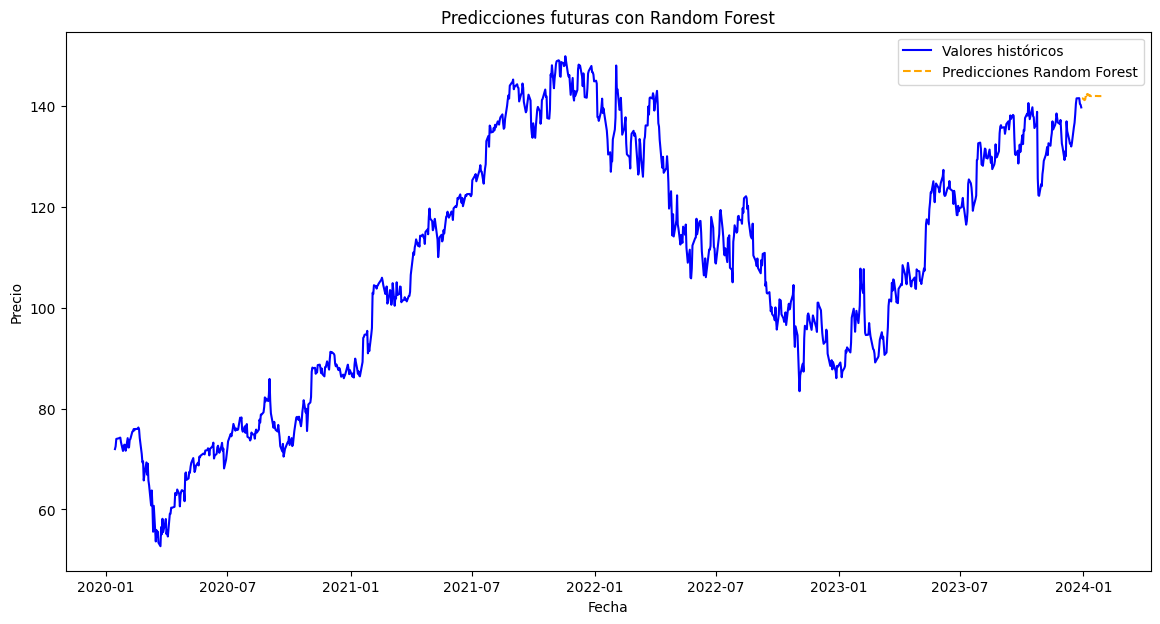

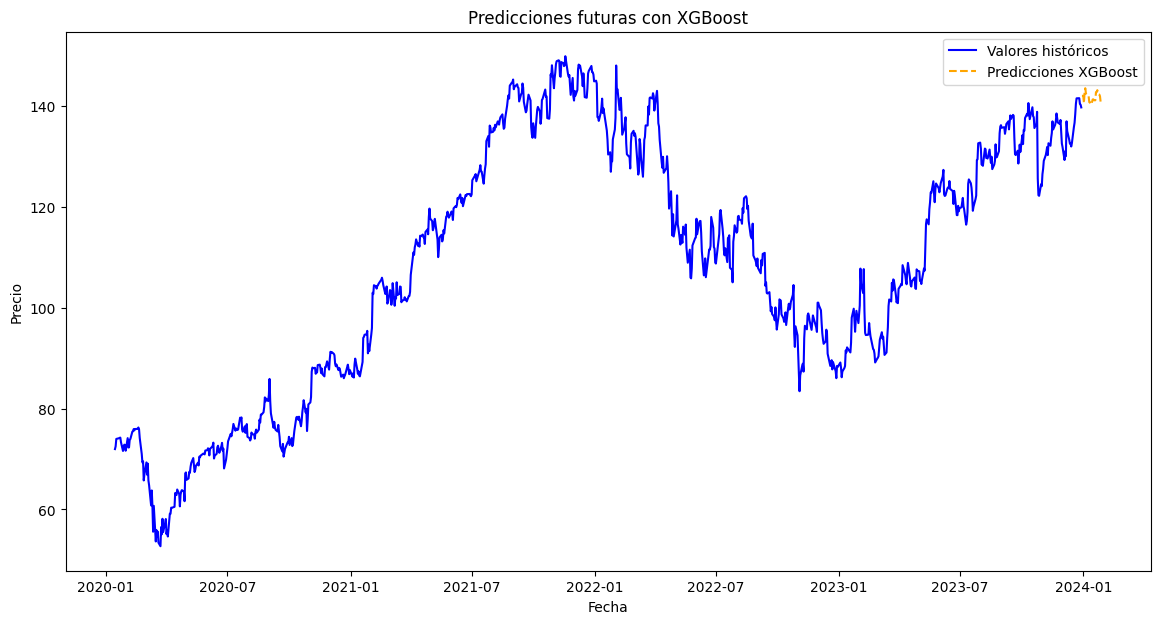

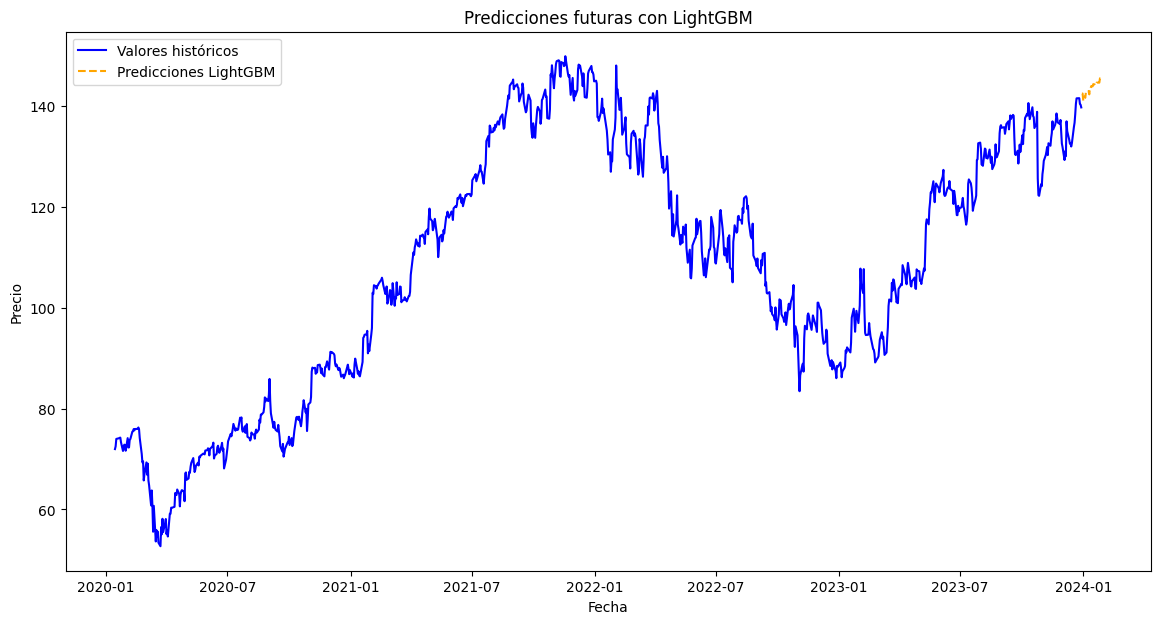

In [18]:
# 9. Hacer predicciones a futuro y graficarlas con todos los modelos
num_days = 30
future_dates_dict = {}
future_predictions_dict = {}

for name, model in trained_models.items():
    future_dates, future_predictions = predict_future_corrected(model, data[['MA_5', 'MA_10', 'Volume', 'Close']], num_days=num_days)
    future_dates_dict[name] = future_dates
    future_predictions_dict[name] = future_predictions

    # Visualizar resultados futuros
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Valores históricos', color='blue')
    plt.plot(future_dates, future_predictions, label=f'Predicciones {name}', linestyle='--',color='orange')
    plt.title(f'Predicciones futuras con {name}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

### Análisis de Resultados

#### Regresión Lineal
- **RMSE**: 2.30
- **MAE**: 1.71
- **R²**: 0.96
- **Conclusión**: Este modelo tiene el mejor rendimiento en términos de RMSE y MAE, además de un R² muy alto, lo que indica que está capturando muy bien la varianza en los datos.

#### K-Vecinos más Cercanos
- **RMSE**: 25.17
- **MAE**: 21.49
- **R²**: -3.78
- **Conclusión**: Este modelo muestra un rendimiento muy pobre, con un alto RMSE y MAE. Un R² negativo indica que el modelo no está capturando la relación en los datos en absoluto. Es posible que necesite ajustar los hiperparámetros o considerar si los vecinos más cercanos son la mejor opción para este tipo de datos.

#### Árbol de Decisión
- **RMSE**: 3.30
- **MAE**: 2.48
- **R²**: 0.92
- **Conclusión**: Este modelo presenta un buen rendimiento, aunque no tan bueno como el de la regresión lineal. La simplicidad del árbol de decisión puede no ser suficiente para capturar patrones complejos en los datos.

#### Random Forest
- **RMSE**: 2.51
- **MAE**: 1.92
- **R²**: 0.95
- **Conclusión**: Este modelo también tiene un rendimiento fuerte y es muy competitivo con la regresión lineal, aunque no supera sus métricas. Random Forest tiende a ser más robusto ante el sobreajuste que un árbol de decisión simple.

#### XGBoost
- **RMSE**: 2.72
- **MAE**: 2.00
- **R²**: 0.94
- **Conclusión**: Aunque este modelo es potente, sus métricas son ligeramente peores que las de la regresión lineal y el Random Forest. Aun así, sigue siendo un modelo sólido.

#### LightGBM
- **RMSE**: 2.46
- **MAE**: 1.83
- **R²**: 0.95
- **Conclusión**: Este modelo se comporta bien, con métricas similares a las de Random Forest, y es muy competitivo en rendimiento.

### Conclusión General
- **Mejor Modelo**: La Regresión Lineal parece ser el mejor modelo según estas métricas, ya que tiene el RMSE más bajo y el R² más alto. Sin embargo, también es importante considerar la complejidad del modelo y la interpretabilidad.
- **Modelos Sólidos**: Random Forest y LightGBM son opciones sólidas que ofrecen un buen equilibrio entre precisión y robustez.
- **Ajuste de Hiperparámetros**: Podría ser útil experimentar con la optimización de hiperparámetros, especialmente para modelos como XGBoost y Random Forest, para ver si se puede mejorar aún más su rendimiento.
- **K-Vecinos más Cercanos**: Este modelo parece no ser adecuado para el conjunto de datos actual y puede ser mejor omitirlo de futuras evaluaciones.
